# graph/partialfill

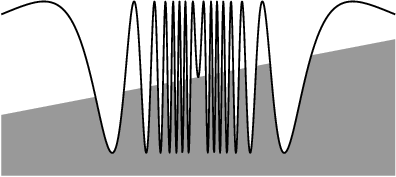

In [1]:
# contributed by Michael Schindler

from pyx import *

# get the lines from the graph
xax = graph.axis.linear(min=-1, max=1.0, painter=None)
yax = graph.axis.linear(min=-1.3, max=1.3, painter=None)
g = graph.graphxy(width=10, ratio=2, x=xax, y=yax)
pifline = g.plot(graph.data.function("y(x)=sin(1.0/(x**2+0.02122))", points=1000))
pihoriz = g.plot(graph.data.function("y(x)=0.5*x", points=2))
g.finish()

# fetch path from info returned by plot method of graph
fline = pifline.path
horiz = pihoriz.path

# intersect the lines
splith, splitf = horiz.intersect(fline)

# create gray area (we do not use simple clipping)
area = horiz.split([splith[0]])[0]
for i in range(0, len(splith)-2, 2):
    area = area.joined(fline.split([splitf[i], splitf[i+1]])[1])
    area = area.joined(horiz.split([splith[i+1], splith[i+2]])[1])
area = area.joined(fline.split([splitf[-2], splitf[-1]])[1])
area = area.joined(horiz.split([splith[-1]])[1])
area.append(path.lineto(*g.vpos(1, 0)))
area.append(path.lineto(*g.vpos(0, 0)))
area.append(path.closepath()) # not really needed (filling closes automatically)

c = canvas.canvas()

# draw first the area, then the function
c.fill(area, [color.gray(0.6)])
c.stroke(fline, [style.linewidth.Thick, style.linejoin.round])

c